In [329]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, RidgeCV, Lasso, ElasticNetCV, LassoCV, Ridge
from sklearn import ensemble
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings('ignore')

# EDA for this Dataset ...

In [330]:
#uploading data ...
df=pd.read_csv('Aqar_Cleaned.csv', index_col=0)

In [331]:
df.head()

,district,home_size,home_price
0,الرمال,300,1350000
1,الملقا,405,4500000
2,الياسمين,375,3700000
3,الفيحاء,700,2200000
4,عكاظ,350,980000


In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10825 entries, 0 to 10841
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   district    10825 non-null  object
 1   home_size   10825 non-null  int64 
 2   home_price  10825 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 338.3+ KB


In [333]:
df.describe()

,home_size,home_price
count,10825.000000,1.082500e+04
mean,385.952794,2.163715e+06
std,402.240331,3.321829e+06
min,103.000000,5.000000e+04
25%,256.000000,1.120000e+06
50%,300.000000,1.300000e+06
75%,375.000000,2.000000e+06
max,15000.000000,1.000000e+08


# Here we start with Cleaning data (remove duplicated and outliers)

In [334]:
df.shape

(10825, 3)

In [335]:
#check if there is any null values
df.isnull().sum() 

district      0
home_size     0
home_price    0
dtype: int64

In [336]:
# show most area duplicated in the dataset

df['home_size'].value_counts()

300     2061
200     1080
250      602
375      555
360      522
        ... 
1730       1
1127       1
1485       1
839        1
530        1
Name: home_size, Length: 502, dtype: int64

In [337]:
# show most price duplicated in the dataset
df['home_price'].value_counts()

1300000    635
1200000    482
1350000    469
1250000    428
1100000    360
          ... 
2340000      1
8400000      1
1399000      1
1944000      1
1590000      1
Name: home_price, Length: 350, dtype: int64

In [338]:
# show most district duplicated in the dataset
df['district'].value_counts()

طويق             2364
الرمال           1311
بدر               616
عكاظ              591
المهدية           505
                 ... 
الملك عبدالله       1
المصفاة             1
الغنامية            1
الكبير              1
غبيرة               1
Name: district, Length: 128, dtype: int64

In [339]:
# check duplicated values
df.duplicated().sum()

6071

In [340]:
# show sample of duplicated values
duplicated_rows = df[(df['district']=='طويق') & (df['home_price'] == 1300000) & (df['home_size'] == 250)]
duplicated_rows

,district,home_size,home_price
197,طويق,250,1300000
541,طويق,250,1300000
636,طويق,250,1300000
4222,طويق,250,1300000
5487,طويق,250,1300000


In [341]:
# drop duplicated values using drop_duplicates()
df.drop_duplicates(inplace=True)

In [342]:
# check duplicated values agian, there is no duplicated values anymore
df.duplicated().sum()

0

In [343]:
# show the shape of dataset afte drop duplicated values.
df.shape

(4754, 3)

In [188]:
# here we have 5 rows called أحد which is same value with other one

len(df[(df.district == 'أحد')])

5

In [189]:
# here we have 5 rows also called احد which is same value with last one above
len(df[(df.district == 'احد')])

5

In [191]:
# we need to fix it to make it one value, one name
df['district'].replace('احد', 'أحد', inplace=True)

In [192]:
# Now, we fixed it and it became one an total 10
len(df[(df.district == 'أحد')])

10

In [193]:
# no duplicated value anymore
len(df[(df.district == 'احد')])

0

In [194]:
# Now, we have 127 district, it will be different after outliers removing
df['district'].unique()

array(['الرمال', 'الملقا', 'الياسمين', 'الفيحاء', 'عكاظ', 'المهدية',
       'البديعة', 'بدر', 'الغدير', 'طويق', 'القادسية', 'لبن', 'التعاون',
       'طيبة', 'النرجس', 'العارض', 'اليرموك', 'العزيزية', 'الرفيعة',
       'عرقة', 'الشفا', 'الحزم', 'النهضة', 'الربوة', 'العقيق', 'حطين',
       'الدولي', 'اشبيلية', 'الحمراء', 'الجنادرية', 'القدس', 'المنار',
       'النظيم', 'الشرق', 'الغربي', 'المونسية', 'نمار', 'القيروان',
       'الجديدة', 'الغربية', 'الوسطى', 'البيضاء', 'قرطبة',
       'الملك عبدالله', 'ديراب', 'الاندلس', 'النفل', 'السعادة', 'الواحة',
       'العليا', 'الزهرة', 'الروابي', 'السويدي', 'شبرا', 'الوشام',
       'المروج', 'الصحافة', 'النخيل', 'الضباط', 'أحد', 'الخطاب', 'الروضة',
       'السليمانية', 'الوسيطا', 'المعيزيلة', 'البيان', 'الخليج',
       'الخزامى', 'ثليم', 'غرناطة', 'المنصورية', 'الندى', 'الندوة',
       'المروة', 'الرحمانية', 'الخالدية', 'المحمدية', 'الورود', 'فيصل',
       'الشرقي', 'الريان', 'المنصورة', 'العريجاء', 'الفلاح', 'فهد',
       'الملز', 'السلام', 'الزه

In [195]:
df['district'].nunique()

127

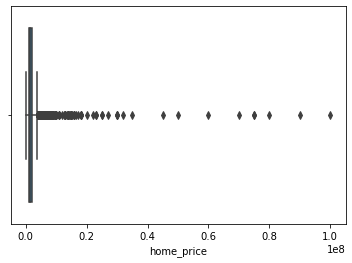

In [196]:
# the price outliers
ax = sns.boxplot(x=df['home_price'])

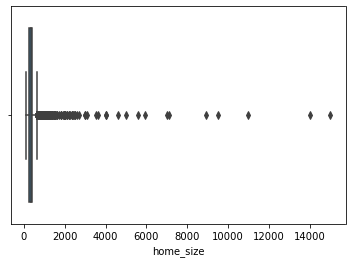

In [197]:
# the area outliers


ax = sns.boxplot(x='home_size', data=df)

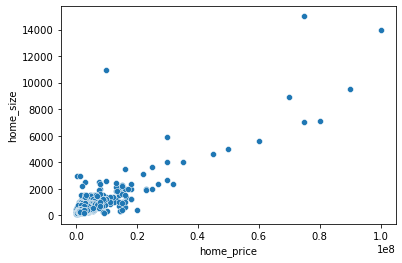

In [198]:
# show price & size outliers in scatter plot
sns.scatterplot(data=df,x=df['home_price'], y=df['home_size'])
plt.show()

In [344]:
# Let's remove outliers by applying IQR 
outlier=[]

def outliers(price, size):
    q1 = price[size].quantile(0.25)
    q3 = price[size].quantile(0.75)
    iqr = q3 - q1
    
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    
    ls = price.index[ (price[size] < lower_limit) | (price[size] > upper_limit) ]
    return ls

In [345]:
# here we can show the ouliers in a list
index_list = []
for outlier in ['home_size', 'home_price']:
    index_list.extend(outliers(df, outlier))

In [346]:
# function to remove outliers
def remove_outliers(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls) 
    return df

In [347]:
df_cleaned = remove_outliers(df, index_list)

In [348]:
# after remove outliers
df_cleaned['district'].nunique()

115

In [349]:
df_cleaned.shape

(4103, 3)

In [350]:
df_cleaned.describe()

,home_size,home_price
count,4103.000000,4.103000e+03
mean,330.329271,1.541124e+06
std,90.437838,6.813726e+05
min,103.000000,5.000000e+04
25%,260.000000,1.070000e+06
50%,312.000000,1.350000e+06
75%,375.000000,1.850000e+06
max,645.000000,3.850000e+06


# Data visualising after cleaning the dataset ...

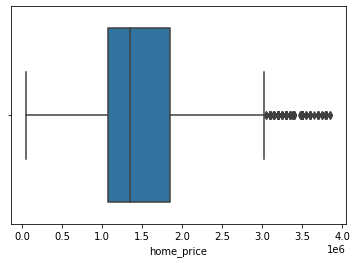

In [351]:
# the price without outliers
ax = sns.boxplot(x=df_cleaned['home_price'])

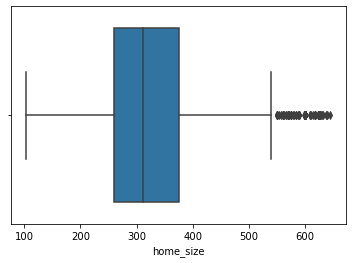

In [352]:
# the price without outliers
ax = sns.boxplot(x=df_cleaned['home_size'])

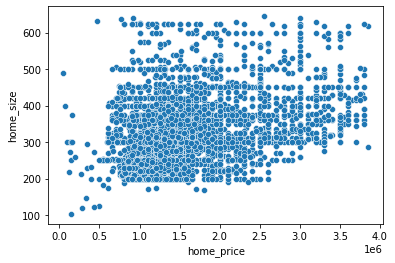

In [353]:
# show price & size wsithout outliers in scatter plot
sns.scatterplot(data=df,x=df_cleaned['home_price'], y=df_cleaned['home_size'])
plt.show()

# applying ML algorithms ...

In [354]:
ds=pd.get_dummies(df_cleaned['district'])


In [355]:
data= pd.concat([df_cleaned,ds],axis=1)

In [356]:
data.drop(['district'],axis=1,inplace=True)

In [357]:
X = data.drop(['home_price'],axis=1)
y = data['home_price']

In [396]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [397]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Text(0.5, 0, 'home_price')

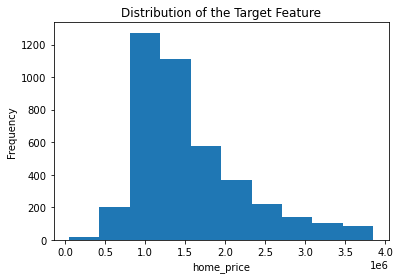

In [375]:
#Visualize the target feature
plt.hist(y)
plt.title("Distribution of the Target Feature")
plt.ylabel("Frequency")
plt.xlabel("home_price")

In [376]:
X_train.shape

(2872, 116)

In [377]:
X_test.shape

(1231, 116)

In [378]:
y_test.shape

(1231,)

# ML Algorthims (Modelling) ...

In [398]:
#define the evaluation function
def evaluate(model, test_features, test_labels, train_features, train_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(abs(accuracy)))
    print('the goodness of fit r square for the train dataset is:',model.score(train_features, train_labels))
    print('the goodness of fit r square for the test dataset is:',r2_score(test_labels, predictions))
    print('the RMSE is: ', np.sqrt(mean_squared_error(test_labels, predictions)))

# 1- Linear Regression

In [380]:
#create linear regression model
lm=LinearRegression()
lm.fit(X_train, y_train)
evaluate(lm,X_test, y_test, X_train, y_train)

Model Performance
Average Error: 28687654146598384.0000 degrees.
Accuracy = 2108752952237.83%.
the goodness of fit r square for the train dataset is: 0.810436129493912
the goodness of fit r square for the test dataset is: -3.601105619864604e+23
the RMSE is:  4.088472019868982e+17


In [381]:
#when using GridsearchCV with Linear Reg.

model = linear_model.LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=10)
grid.fit(X_train, y_train)
evaluate(grid,X_test, y_test, X_train, y_train)

Model Performance
Average Error: 1310990670764723.5000 degrees.
Accuracy = 88232353223.34%.
the goodness of fit r square for the train dataset is: 0.8104371027913506
the goodness of fit r square for the test dataset is: -1.5545441271348168e+21
the RMSE is:  2.6862388599937784e+16


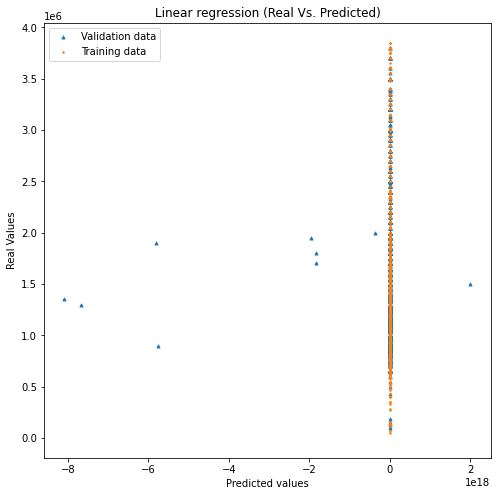

In [382]:
plt.figure(figsize=(8,8))
plt.scatter(lm.predict(X_test) , y_test,marker = "^", label = "Validation data", s=9) 
plt.scatter(lm.predict(X_train), y_train,marker = ".", label = 'Training data', s=9)
plt.title("Linear regression (Real Vs. Predicted)")
plt.xlabel("Predicted values")
plt.ylabel("Real Values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "purple")
plt.show()

# 2- Regualization Models (Lasso,Ridge and ElasticNet)

# a) Lasso

In [385]:
lasso = LassoCV(alphas = None, max_iter = 50000, cv = 10, normalize = True)
lasso.fit(X_train,y_train)
print('The Lasso lambda is:',lasso.alpha_)
evaluate(lasso,X_test, y_test, X_train, y_train)

The Lasso lambda is: 32.93971740646957
Model Performance
Average Error: 218237.2558 degrees.
Accuracy = 82.54%.
the goodness of fit r square for the train dataset is: 0.8097484903093959
the goodness of fit r square for the test dataset is: 0.7882742202271904
the RMSE is:  313494.53238997434


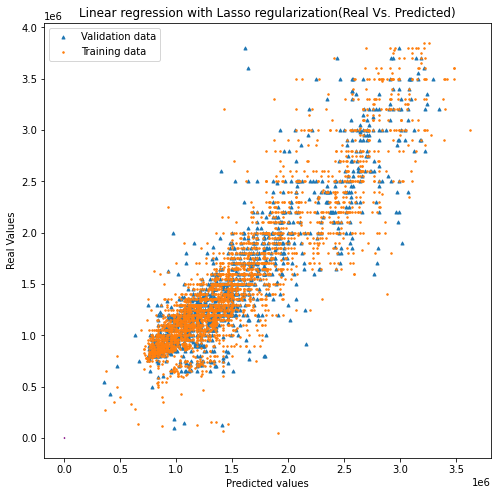

In [402]:
plt.figure(figsize=(8,8))
plt.scatter(lasso.predict(X_test) , y_test,marker = "^", label = "Validation data", s=9) 
plt.scatter(lasso.predict(X_train), y_train,marker = ".", label = 'Training data', s=9)
plt.title("Linear regression with Lasso regularization(Real Vs. Predicted)")
plt.xlabel("Predicted values")
plt.ylabel("Real Values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "purple")
plt.show()

Lasso picked 102 features and eliminated the other 14 features


Text(0.5, 0, 'Coefficents')

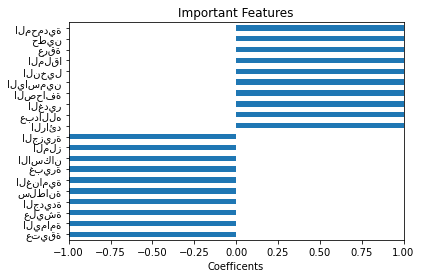

In [403]:
#plot feature importance (the magnitude of features in the regression funciton)
X_train = pd.DataFrame(X_train, columns = X.columns)
coefs = pd.Series(lasso.coef_, index = X_train.columns)
top_coefs = pd.concat([coefs.sort_values().head(10),
                       coefs.sort_values().tail(10)])
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
top_coefs.plot(kind = 'barh')
plt.title('Important Features')
plt.xlim(-1,1)
plt.xlabel('Coefficents')

In [404]:
#coefficient change with alpha
lasso = linear_model.Lasso(normalize=True)
alphas_lasso = np.logspace(-5, -1, 100)
coef_lasso = [] #going to get one coef_ value for each alpha
for i in alphas_lasso:
    lasso.set_params(alpha=i).fit(X_train,y_train)
    coef_lasso.append(lasso.coef_)

Text(0, 0.5, 'coefficients')

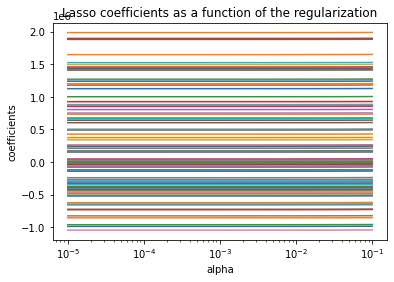

In [132]:
title = 'Lasso coefficients as a function of the regularization'
columns = X_train.columns
df_coef = pd.DataFrame(coef_lasso, index=alphas_lasso, columns=columns)
df_coef.plot(logx=True, title=title, legend=False)
plt.xlabel('alpha')
plt.ylabel('coefficients')

# b) Ridge

In [400]:
alphas_ridge = np.logspace(-5, 2, 100)
ridge = RidgeCV(alphas = alphas_ridge, cv = 10, normalize = True)
ridge.fit(X_train,y_train)
print('The ridge lambda is:',ridge.alpha_)
evaluate(ridge,X_test, y_test, X_train, y_train)

The ridge lambda is: 0.034304692863149154
Model Performance
Average Error: 218257.3475 degrees.
Accuracy = 82.53%.
the goodness of fit r square for the train dataset is: 0.8096770034197065
the goodness of fit r square for the test dataset is: 0.78916621962292
the RMSE is:  312833.4601223885


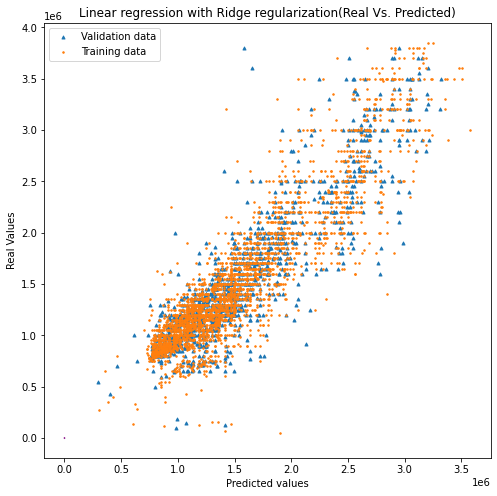

In [405]:
plt.figure(figsize=(8,8))
plt.scatter(ridge.predict(X_test) , y_test,marker = "^", label = "Validation data", s=9) 
plt.scatter(ridge.predict(X_train), y_train,marker = ".", label = 'Training data', s=9)
plt.title("Linear regression with Ridge regularization(Real Vs. Predicted)")
plt.xlabel("Predicted values")
plt.ylabel("Real Values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "purple")
plt.show()

ridge picked 108 features and eliminated the other 8 features


Text(0.5, 0, 'Coefficents')

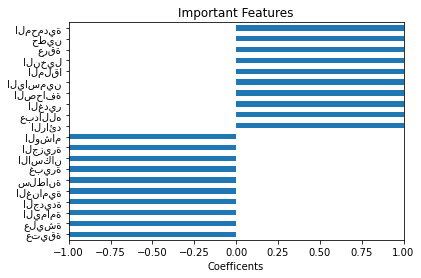

In [406]:
coefs = pd.Series(ridge.coef_, index = X_train.columns)
top_coefs = pd.concat([coefs.sort_values().head(10),
                       coefs.sort_values().tail(10)])
print("ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
top_coefs.plot(kind = 'barh')
plt.title('Important Features')
plt.xlim(-1,1)
plt.xlabel('Coefficents')

In [407]:
#coefficient change with alpha
ridge = linear_model.Ridge(normalize=True)
alphas_ridge = np.logspace(-3, 3, 100)
coef_ridge = [] #going to get one coef_ value for each alpha
for i in alphas_ridge:
    ridge.set_params(alpha=i).fit(X_train,y_train)
    coef_ridge.append(ridge.coef_)

Text(0, 0.5, 'coefficients')

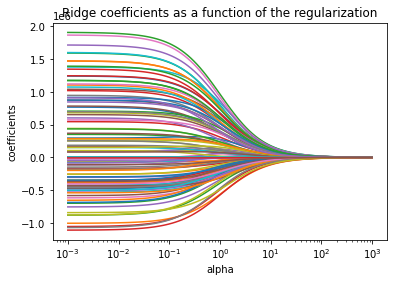

In [408]:
title = 'Ridge coefficients as a function of the regularization'
columns = X_train.columns
df_coef = pd.DataFrame(coef_ridge, index=alphas_ridge, columns=columns)
df_coef.plot(logx=True, title=title, legend=False)
plt.xlabel('alpha')
plt.ylabel('coefficients')

# c) ElasticNet



In [409]:
elastic = ElasticNetCV(alphas = None, max_iter = 50000, cv = 10, normalize = True)
elastic.fit(X_train,y_train)
print('The elastic lambda is:',elastic.alpha_)
evaluate(elastic,X_test, y_test, X_train, y_train)

The elastic lambda is: 10.01308831108615
Model Performance
Average Error: 532386.8343 degrees.
Accuracy = 59.37%.
the goodness of fit r square for the train dataset is: 0.00012593220898238222
the goodness of fit r square for the test dataset is: -8.126200534985806e-05
the RMSE is:  681335.0725683726


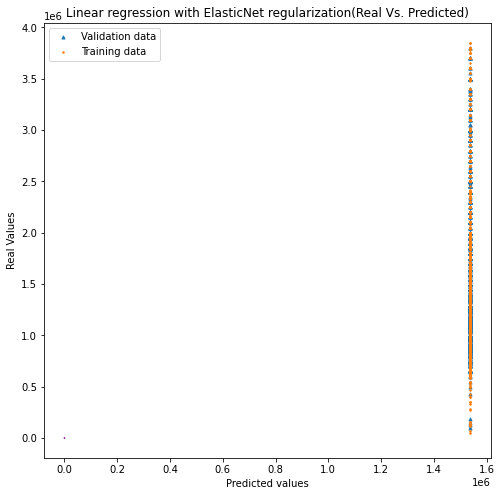

In [410]:
plt.figure(figsize=(8,8))
plt.scatter(elastic.predict(X_test) , y_test,marker = "^", label = "Validation data", s=9) 
plt.scatter(elastic.predict(X_train), y_train,marker = ".", label = 'Training data', s=9)
plt.title("Linear regression with ElasticNet regularization(Real Vs. Predicted)")
plt.xlabel("Predicted values")
plt.ylabel("Real Values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "purple")
plt.show()

ElasticNet picked 107 features and eliminated the other 9 features


Text(0.5, 0, 'Coefficents')

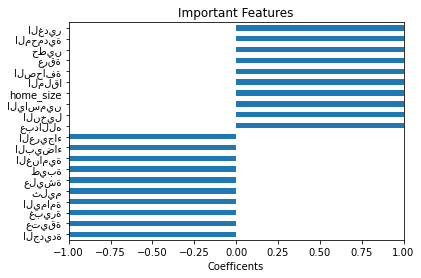

In [411]:
coefs = pd.Series(elastic.coef_, index = X_train.columns)
top_coefs = pd.concat([coefs.sort_values().head(10),
                       coefs.sort_values().tail(10)])
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
top_coefs.plot(kind = 'barh')
plt.title('Important Features')
plt.xlim(-1,1)
plt.xlabel('Coefficents')

In [412]:
#coefficient change with alpha
elastic = linear_model.ElasticNet(normalize=True)
alphas_elastic = np.logspace(-5, -1, 100)
coef_elastic = [] #going to get one coef_ value for each alpha
for i in alphas_elastic:
    elastic.set_params(alpha=i).fit(X_train,y_train)
    coef_elastic.append(elastic.coef_)

Text(0, 0.5, 'coefficients')

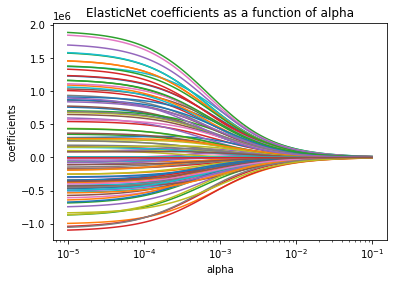

In [413]:
title = 'ElasticNet coefficients as a function of alpha'
columns = X_train.columns
df_coef = pd.DataFrame(coef_elastic, index=alphas_elastic, columns=columns)
df_coef.plot(logx=True, title=title, legend=False)
plt.xlabel('alpha')
plt.ylabel('coefficients')

# 2- Random Forest

In [416]:
rf=RandomForestRegressor()
rf_params = {'n_estimators': [100,200,500],
            'max_features': [3,5,10],
            'min_samples_split':[5,10,20]}
rf_cv_model = GridSearchCV(rf, rf_params, cv=7, n_jobs=-1, verbose=1).fit(X_train, y_train)
rf_cv_model

Fitting 7 folds for each of 27 candidates, totalling 189 fits


GridSearchCV(cv=7, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_features': [3, 5, 10],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [100, 200, 500]},
             verbose=1)

In [417]:
best_params = rf_cv_model.best_params_
print(best_params)

{'max_features': 3, 'min_samples_split': 20, 'n_estimators': 100}


In [418]:
rf = RandomForestRegressor(max_features=best_params['max_features'], min_samples_split=best_params['min_samples_split'], n_estimators=best_params['n_estimators']).fit(X_train, y_train)
evaluate(rf, X_test, y_test, X_train, y_train)

Model Performance
Average Error: 202876.2464 degrees.
Accuracy = 83.89%.
the goodness of fit r square for the train dataset is: 0.8632414330482328
the goodness of fit r square for the test dataset is: 0.8037005822873131
the RMSE is:  301857.94139837835


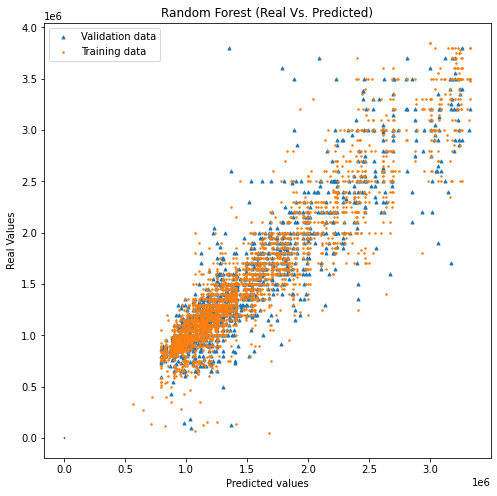

In [419]:
plt.figure(figsize=(8,8))
plt.scatter(rf.predict(X_test) , y_test,marker = "^", label = "Validation data", s=9) 
plt.scatter(rf.predict(X_train), y_train,marker = ".", label = 'Training data', s=9)
plt.title("Random Forest (Real Vs. Predicted)")
plt.xlabel("Predicted values")
plt.ylabel("Real Values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "purple")
plt.show()

In [420]:
randomForest=ensemble.RandomForestRegressor()
n_trees_range = range(30, 200, 10)  # OOB score will warning if too few trees
train_error2 = []
test_error2 = []
oob_error = []

for n_trees in n_trees_range:
    randomForest.set_params(n_estimators=n_trees, random_state=42, oob_score=True)
    randomForest.fit(X_train, y_train)
    train_error2.append(1 - randomForest.score(X_train, y_train))
    test_error2.append(1 - randomForest.score(X_test, y_test))
    oob_error.append(1 - randomForest.oob_score_)

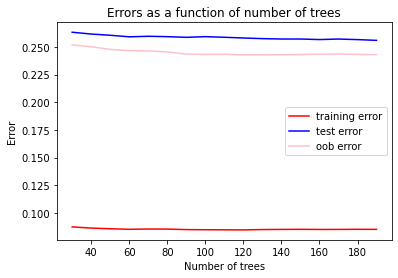

In [279]:
plt.plot(n_trees_range, train_error2, c='red', label='training error')
plt.plot(n_trees_range, test_error2, c='blue', label='test error')
plt.plot(n_trees_range, oob_error, c='pink', label='oob error')
plt.ylabel('Error')
plt.xlabel('Number of trees')
plt.title('Errors as a function of number of trees')
plt.legend()
plt.show()

# 4-KNN

In [168]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
Kmodel = KNeighborsRegressor(algorithm='auto', leaf_size=15, n_neighbors=4, p=1, weights='distance')
Kmodel.fit(rescaledX, y_train)
evaluate(Kmodel, X_test, y_test, X_train, y_train)

Model Performance
Average Error: 481663.9602 degrees.
Accuracy = 62.77%.
the goodness of fit r square for the train dateset is: 0.14034383581702015
the goodness of fit r square for the test dateset is: 0.14519048132779633
the RMSE is:  632999.185442698


In [308]:
#when using GridsearchCV with KNN 

#param_grid = {'n_neighbors': np.arange(1, 12, ),'weights': ['uniform','distance'],'leaf_size':np.arange(1,16,)}

In [310]:
#from sklearn.model_selection import KFold
#knn = KNeighborsRegressor()
#gscv = GridSearchCV(knn, param_grid, cv=KFold(n_splits=3,shuffle=True, random_state=0))
#gscv.fit(rescaledX, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'weights': ['uniform', 'distance']})

In [313]:
#evaluate(gscv, X_test, y_test, X_train, y_train)

Model Performance
Average Error: 512699.0017 degrees.
Accuracy = 61.67%.
the goodness of fit r square for the train dateset is: 0.028601983602645875
the goodness of fit r square for the test dateset is: 0.04612419227243292
the RMSE is:  668607.7530643498
